In [136]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline 

In [137]:
df = pd.read_csv('../../../../datasets/parte1/dataset_cleaned.csv')

In [138]:
df.shape

(219172, 23)

In [139]:
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

In [141]:
def build_model(activation = 'relu', learning_rate = 0.01):
    model = Sequential()
    model.add(Dense(16, input_dim = 22, activation = activation))
    model.add(Dense(8, activation = activation))
    model.add(Dense(1, activation = activation)) # output 

    #Compile the model 
    model.compile(
        loss = 'binary_crossentropy', # Rever este loss
        optimizer  = tf.optimizers.Adam(learning_rate),
        metrics = ['accuracy']) # 'f1score'
    return model 
    

In [142]:
model = build_model()
model.summary()

Model: "sequential_79"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_237 (Dense)           (None, 16)                368       
                                                                 
 dense_238 (Dense)           (None, 8)                 136       
                                                                 
 dense_239 (Dense)           (None, 1)                 9         
                                                                 


Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [143]:

param_grid = {
    'optimizer': ['SGD', 'RMSprop', 'Adagrad'] 
} 

In [144]:
kf = KFold(n_splits = 5, shuffle= True, random_state=2023)

In [145]:
model = KerasClassifier(model=build_model, batch_size=32, validation_split=0.3, epochs = 20)

In [146]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='accuracy', refit=True, verbose=2, n_jobs=-1)

In [147]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


Epoch 1/20
3357/3357 [==============================] - 6s 2ms/step - loss: 7.6060 - accuracy: 0.5012 - val_loss: 7.6306 - val_accuracy: 0.4996
Epoch 2/20
3357/3357 [==============================] - 5s 2ms/step - loss: 7.6060 - accuracy: 0.5012 - val_loss: 7.6306 - val_accuracy: 0.4996
Epoch 3/20
3357/3357 [==============================] - 5s 2ms/step - loss: 7.6060 - accuracy: 0.5012 - val_loss: 7.6306 - val_accuracy: 0.4996
Epoch 4/20
3357/3357 [==============================] - 5s 1ms/step - loss: 7.6060 - accuracy: 0.5012 - val_loss: 7.6306 - val_accuracy: 0.4996
Epoch 5/20
3357/3357 [==============================] - 5s 2ms/step - loss: 7.6060 - accuracy: 0.5012 - val_loss: 7.6306 - val_accuracy: 0.4996
Epoch 6/20
3357/3357 [==============================] - 5s 1ms/step - loss: 7.6060 - accuracy: 0.5012 - val_loss: 7.6306 - val_accuracy: 0.4996
Epoch 7/20
3357/3357 [==============================] - 5s 2ms/step - loss: 7.6060 - accuracy: 0.5012 - val_loss: 7.6306 - val_accuracy:

GridSearchCV(cv=KFold(n_splits=5, random_state=2023, shuffle=True),
             estimator=KerasClassifier(batch_size=32, epochs=20, model=<function build_model at 0x000001D606E57130>, validation_split=0.3),
             n_jobs=-1, param_grid={'optimizer': ['SGD', 'RMSprop', 'Adagrad']},
             scoring='accuracy', verbose=2)

In [148]:
#print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Best: 0.500750 using {'optimizer': 'Adagrad'}


In [149]:
best_mlp_model = grid_search.best_estimator_
print(best_mlp_model)

KerasClassifier(
	model=<function build_model at 0x000001D606E57130>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=Adagrad
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.3
	shuffle=True
	run_eagerly=False
	epochs=20
	class_weight=None
)


In [150]:
#best_mlp_model.fit(X_train, y_train, epochs = 20, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/20


4795/4795 [==============================] - 9s 2ms/step - loss: 7.7241 - accuracy: 0.4993 - val_loss: 7.6855 - val_accuracy: 0.5017
Epoch 2/20
4795/4795 [==============================] - 7s 2ms/step - loss: 7.7241 - accuracy: 0.4993 - val_loss: 7.6855 - val_accuracy: 0.5017
Epoch 3/20
4795/4795 [==============================] - 7s 1ms/step - loss: 7.7240 - accuracy: 0.4993 - val_loss: 7.6855 - val_accuracy: 0.5017
Epoch 4/20
4795/4795 [==============================] - 7s 1ms/step - loss: 7.7241 - accuracy: 0.4993 - val_loss: 7.6855 - val_accuracy: 0.5017
Epoch 5/20
4795/4795 [==============================] - 7s 1ms/step - loss: 7.7241 - accuracy: 0.4993 - val_loss: 7.6855 - val_accuracy: 0.5017
Epoch 6/20
4795/4795 [==============================] - 8s 2ms/step - loss: 7.7241 - accuracy: 0.4993 - val_loss: 7.6855 - val_accuracy: 0.5017
Epoch 7/20
4795/4795 [==============================] - 7s 2ms/step - loss: 7.7241 - accuracy: 0.4993 - val_loss: 7.6855 - val_accuracy: 0.5017
Epo

KerasClassifier(
	model=<function build_model at 0x000001D606E57130>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=Adagrad
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.3
	shuffle=True
	run_eagerly=False
	epochs=20
	class_weight=None
)

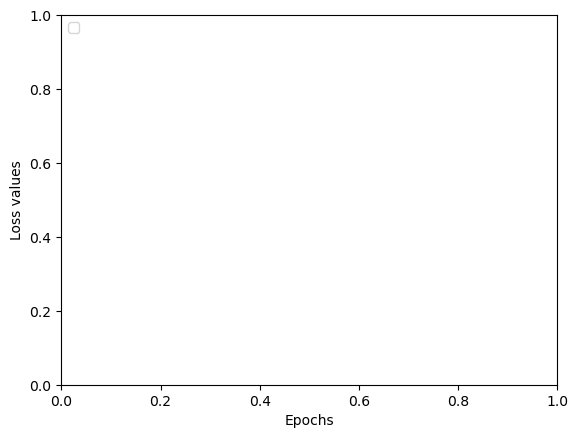

In [155]:
#plt.plot(best_mlp_model.history_['loss'])
#plt.plot(best_mlp_model.history_['val_loss'])
#plt.title('Model Performance')
#plt.ylabel('Loss values')
#plt.xlabel('Epochs')
#plt.legend(['train', 'val'], loc='upper left')
#plt.show()

In [152]:
predictions = best_mlp_model.predict(X_test)

2055/2055 [==============================] - 2s 782us/step


In [153]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     32991
           1       0.00      0.00      0.00     32761

    accuracy                           0.50     65752
   macro avg       0.25      0.50      0.33     65752
weighted avg       0.25      0.50      0.34     65752



c:\Users\gui\anaconda3\envs\DAA\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gui\anaconda3\envs\DAA\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gui\anaconda3\envs\DAA\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


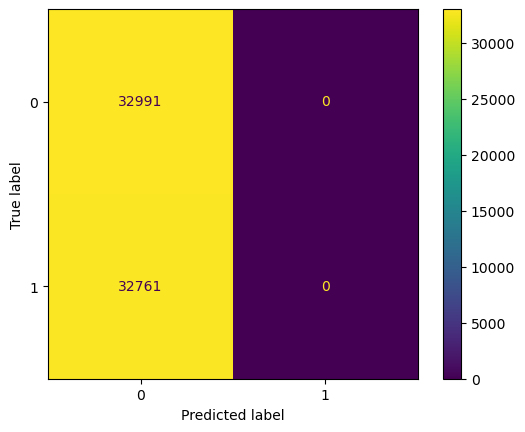

In [154]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions)
plt.show()